## Importing Necessary Libraries and Functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Loading in the Data

In [108]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ["sepal-length", "sepal-width", "petal-length", "petal-width", "class"]
df = pd.read_csv(url, names=names)

In [109]:
df.shape

(150, 5)

In [110]:
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Implementing our own train-test split

In [111]:
def train_validate_test_split(data, labels, test_ratio=0.3, val_ratio=0.3):
    indices = np.arange(len(data))
    np.random.shuffle(indices)

    test_size = int(len(data) * test_ratio)
    val_size = int(len(data) * val_ratio)
    train_size = len(data) - test_size - val_size

    train_indices = indices[:train_size]
    val_indices = indices[train_size : train_size + val_size]
    test_indices = indices[train_size + val_size :]

    return (
        data.iloc[train_indices],
        labels.iloc[train_indices],
        data.iloc[val_indices],
        labels.iloc[val_indices],
        data.iloc[test_indices],
        labels.iloc[test_indices],
    )

## Splitting the data

In [112]:
X = df.drop(columns='class')
y = df['class']

In [120]:
X_train, y_train, X_val, y_val, X_test, y_test = train_validate_test_split(X, y)

In [121]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(60, 4) (60,)
(45, 4) (45,)
(45, 4) (45,)


## Training a Naive Bayes model

In [122]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [123]:
y_pred = model.predict(X_test)

## Implementing my own accuracy scorer

In [124]:
def calculate_accuracy(y, y_pred):
    correct_ones = sum(1 for pred, fact in zip(y_pred, y) if pred == fact)
    total_sum = len(y)
    accuracy = correct_ones / total_sum
    return accuracy

In [125]:
calculate_accuracy(y_test, y_pred)

0.9777777777777777

In [126]:
# Built-in version
accuracy_score(y_test, y_pred)

0.9777777777777777

In [127]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.94      1.00      0.97        17

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45



## Drawing the decision boundary

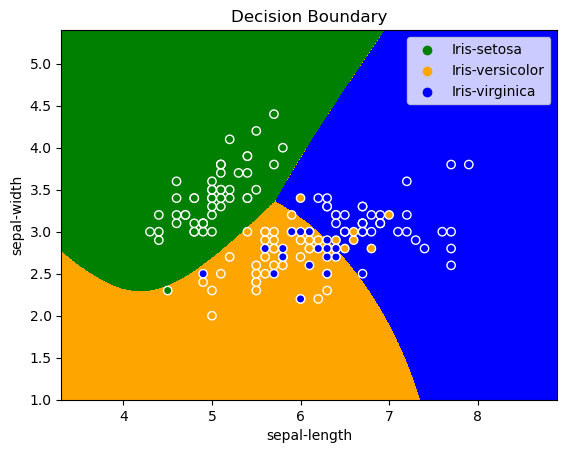

In [143]:
from sklearn.preprocessing import LabelEncoder

X = df.iloc[:, :2]
y = df['class']

encoder = LabelEncoder()
y = encoder.fit_transform(y)

model = GaussianNB()
model.fit(X, y)

x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap = ListedColormap(['Green', 'Orange', 'Blue'])

plt.contourf(xx, yy, Z, cmap=cmap)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='white', cmap=cmap)

class_labels = encoder.inverse_transform([0, 1, 2])
for idx, class_name in enumerate(class_labels, start=1):
    plt.scatter([], [], color=cmap(idx - 1), label=f'{class_name}')

plt.legend()
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.title('Decision Boundary')
plt.show()